# COVID-19 Auswertung - new cases, deaths, Intensivstationen
## DIVI und WHO Daten - Deutschland und einige Nachbarn


In [1]:
# import libraries
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
import numpy as np

# performance
from datetime import datetime
from datetime import date # todays date
import seaborn as sns

import os
now = datetime.now()

## Dataframes definieren

In [2]:
# Webabruf - CSV einlesen
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
#gleitender Mittelwert der cases und deaths, 7 Tage
data['MA'] = data['New_cases'].rolling(window=7,min_periods=1).mean()
data['MA_deaths'] = data['New_deaths'].rolling(window=7, min_periods=1).mean()

# Lokal - CSV einlesen
df = pd.read_csv("D:\Github\Covid-19-Auswertung-WHO-DIVI\data-WvhXR.csv")

In [3]:
# Date_reported in eine Datumsspalte umwandeln
data['Date_reported'] = pd.to_datetime(data.Date_reported, utc=True)

df['date'] = pd.to_datetime(df.date, utc=True)

#Timestamp definieren  YYYY-MM-DD
ts = pd.to_datetime('2020-10-01', utc=True)

#dataframe reduzieren 
data = data.loc[data.Date_reported >= ts, :]
df = df.loc[df.date >= ts, :]

In [4]:
# Länder definieren
ger = data[data.Country == 'Germany']   # 
fr = data[data.Country == 'France']   #
at = data[data.Country == 'Austria']   #
pl = data[data.Country == 'Poland']   #
cz = data[data.Country == 'Czechia']   #
ch = data[data.Country == 'Switzerland']   #
it = data[data.Country == 'Italy']  
es = data[data.Country == 'Spain']  
gb = data[data.Country == 'The United Kingdom']  
se = data[data.Country == 'Sweden'] 

euro = data[data.WHO_region == 'EURO']

## Variablen für die Plots definieren

In [5]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 28

In [6]:
# Einwohnerzahlen
E_fr = 66012908
E_pl = 38659927
E_ger = 81504947
E_cz = 10586651
E_at = 8902600
E_ch = 8847020
E_gb = 66650000

In [7]:
# Bezugsgröße Einwohner
pE = 100000

# Heutiges Datum und formatieren dd.mm.YYYY
today = date.today().strftime("%d.%m.%Y")

## Visualisierung Plots
### Todesfälle 7 Tage Mittelwert (absolute Zahlen) 

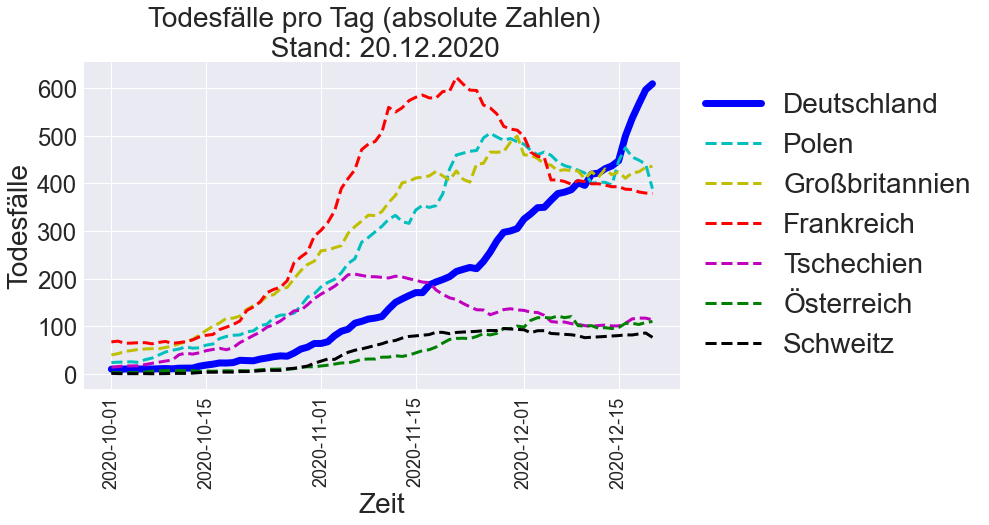

In [8]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020
plt.plot(ger.Date_reported,ger['MA_deaths'], 'b-', linewidth = lwb, label = "Deutschland") # blau, linie, dick
plt.plot(pl.Date_reported,pl['MA_deaths'], 'c--', linewidth = lws, label = "Polen") # cyan, gestrichelt, dünn
plt.plot(gb.Date_reported,gb['MA_deaths'], 'y--', linewidth = lws, label = "Großbritannien") # gelb, gestrichelt, dünn
plt.plot(fr.Date_reported,fr['MA_deaths'], 'r--', linewidth = lws, label = "Frankreich") # rot, gestrichelt, dünn
plt.plot(cz.Date_reported,cz['MA_deaths'], 'm--', linewidth = lws, label = "Tschechien") # magenta, gestrichelt, dünn
plt.plot(at.Date_reported,at['MA_deaths'], 'g--', linewidth = lws, label = "Österreich") # grün, gestrichelt, dünn
plt.plot(ch.Date_reported,ch['MA_deaths'], 'k--', linewidth = lws, label = "Schweitz") # schwarz, gestrichelt, dünn





# Legende 
plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.title('Todesfälle pro Tag (absolute Zahlen)  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_deaths_absolute numbers.jpg', dpi = 150, bbox_inches='tight')

### Todesfälle 7 Tage Mittelwert (pro 100.000 Einwohner)

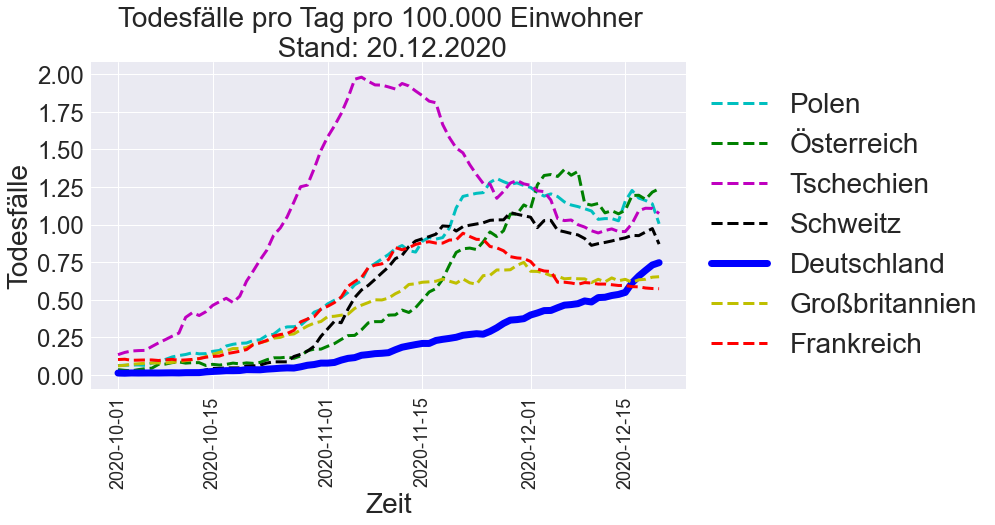

In [9]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020

plt.plot(pl.Date_reported,pl['MA_deaths'] * (pE/E_pl), 'c--', linewidth = lws, label = "Polen") # cyan, gestrichelt, dünn
plt.plot(at.Date_reported,at['MA_deaths'] * (pE/E_at), 'g--', linewidth = lws, label = "Österreich") # grün, gestrichelt, dünn
plt.plot(cz.Date_reported,cz['MA_deaths'] * (pE/E_cz), 'm--', linewidth = lws, label = "Tschechien") # magenta, gestrichelt, dünn
plt.plot(ch.Date_reported,ch['MA_deaths'] * (pE/E_ch), 'k--', linewidth = lws, label = "Schweitz") # schwarz, gestrichelt, dünn
plt.plot(ger.Date_reported,ger['MA_deaths'] * (pE/E_ger), 'b-', linewidth = lwb, label = "Deutschland") # blau, linie, dick
plt.plot(gb.Date_reported,gb['MA_deaths'] * (pE/E_gb), 'y--', linewidth = lws, label = "Großbritannien") # gelb, gestrichelt, dünn
plt.plot(fr.Date_reported,fr['MA_deaths'] * (pE/E_fr), 'r--', linewidth = lws, label = "Frankreich") # rot, gestrichelt, dünn


# Legende 
plt.legend(['Polen', 'Österreich', 'Tschechien','Schweitz', 'Deutschland', 'Großbritannien', 'Frankreich'],
           loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.title('Todesfälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_deaths.jpg', dpi = 150, bbox_inches='tight')

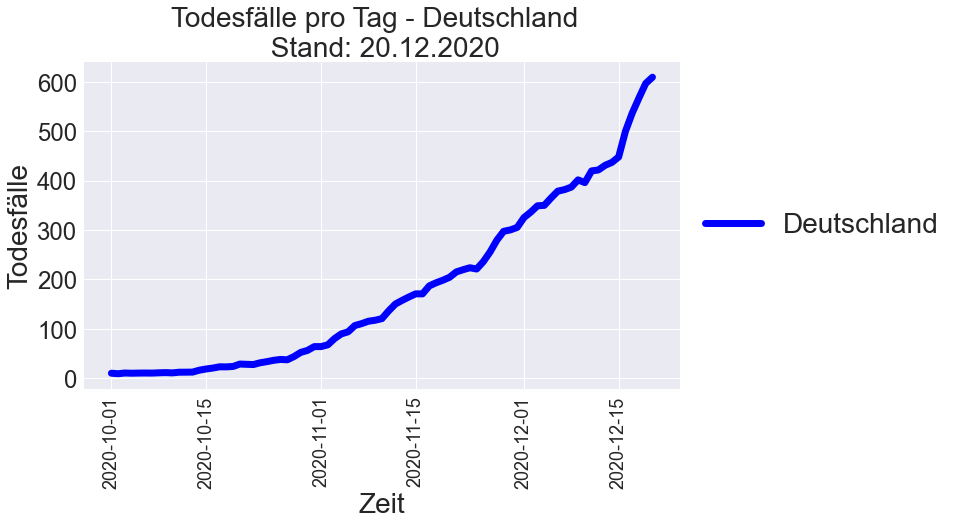

In [10]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020

plt.plot(ger.Date_reported,ger['MA_deaths'], 'b-', linewidth = lwb, label = "Deutschland") # blau, linie, dick

# Legende 
plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.title('Todesfälle pro Tag - Deutschland  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_deaths_ger.jpg', dpi = 150, bbox_inches='tight')

### Neue Fälle 7 Tage Mittelwert (pro 100.000 Einwohner)

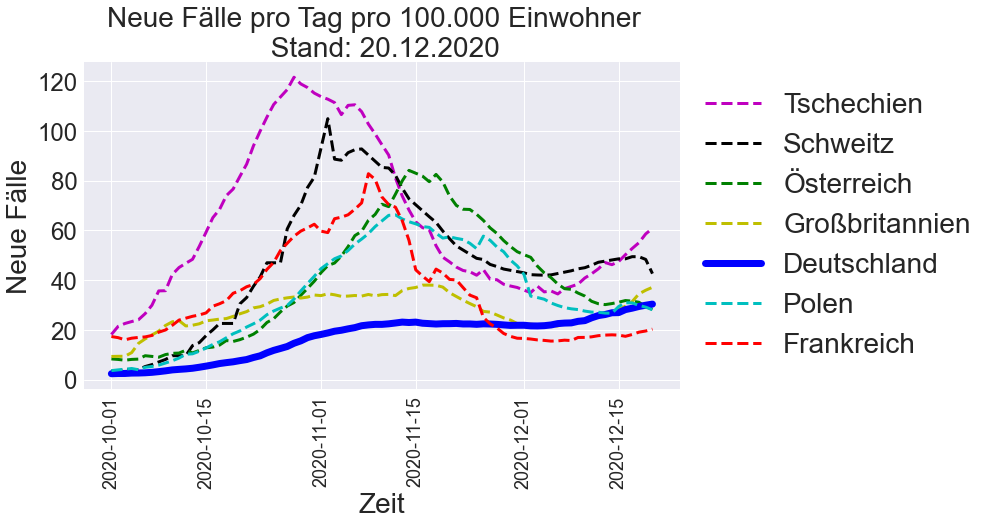

In [11]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

plt.plot(cz.Date_reported,cz['MA']* (pE/E_cz), 'm--', linewidth = lws, label="Tschechien")
plt.plot(ch.Date_reported,ch['MA']* (pE/E_ch), 'k--', linewidth = lws, label="Schweitz")
plt.plot(at.Date_reported,at['MA']* (pE/E_at), 'g--', linewidth = lws, label="Österreich")
plt.plot(gb.Date_reported,gb['MA']* (pE/E_gb), 'y--', linewidth = lws, label="Großbritannien")
plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), 'b-', linewidth = lwb, label="Deutschland")
plt.plot(pl.Date_reported,pl['MA']* (pE/E_pl), 'c--', linewidth = lws, label="Polen")
plt.plot(fr.Date_reported,fr['MA']* (pE/E_fr), 'r--', linewidth = lws, label="Frankreich")

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)


# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.title('Neue Fälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_cases.jpg', dpi = 150, bbox_inches='tight')

### Neue Fälle 7 Tage Mittelwert (absolute Zahlen)

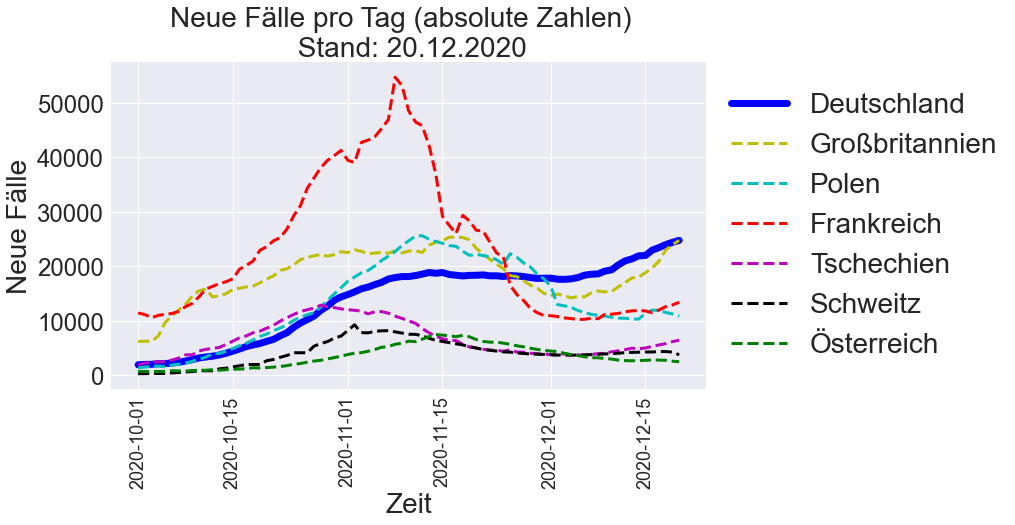

In [12]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

plt.plot(ger.Date_reported,ger['MA'], 'b-', linewidth = lwb, label="Deutschland")
plt.plot(gb.Date_reported,gb['MA'], 'y--', linewidth = lws, label="Großbritannien")
plt.plot(pl.Date_reported,pl['MA'], 'c--', linewidth = lws, label="Polen")
plt.plot(fr.Date_reported,fr['MA'], 'r--', linewidth = lws, label="Frankreich")
plt.plot(cz.Date_reported,cz['MA'], 'm--', linewidth = lws, label="Tschechien")
plt.plot(ch.Date_reported,ch['MA'], 'k--', linewidth = lws, label="Schweitz")
plt.plot(at.Date_reported,at['MA'], 'g--', linewidth = lws, label="Österreich")

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.title('Neue Fälle pro Tag (absolute Zahlen)  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_cases_absolute numbers.jpg', dpi = 150, bbox_inches='tight')

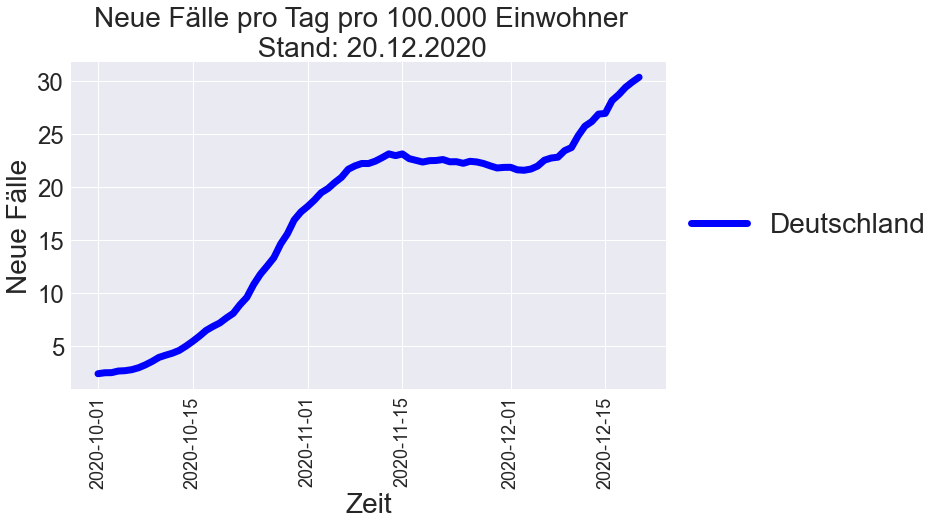

In [13]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 
plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), 'b-', linewidth = lwb, label = "Deutschland")

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.title('Neue Fälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_cases_ger.jpg', dpi = 150, bbox_inches='tight')

### Intensivstationen DIVI

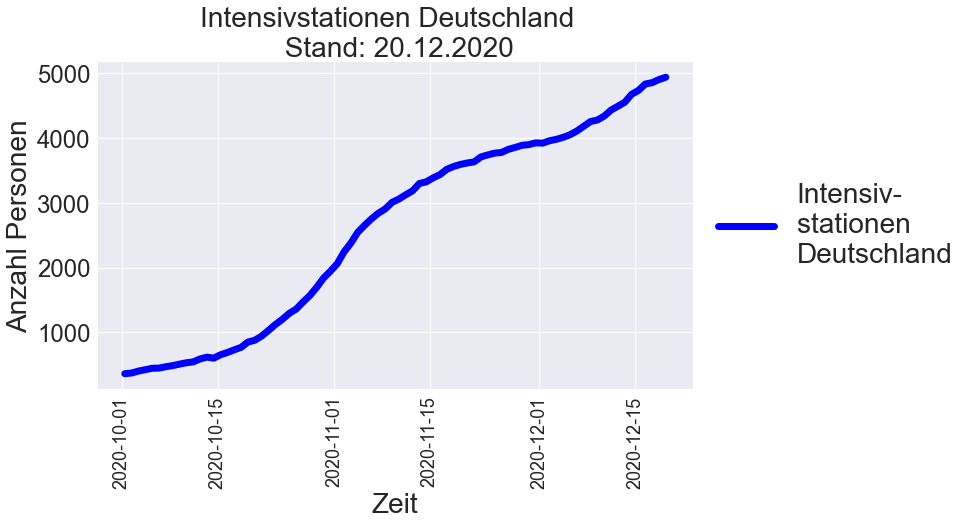

In [14]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))

plt.style.use('seaborn')
plt.grid(True)
plt.plot(df.date,df['COVID-19-Fälle'], 'b-', linewidth = lwb, label = "Intensiv-\nstationen \nDeutschland")
plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)

# plt.xticks([])
plt.ylabel('Anzahl Personen', fontsize=size)
plt.title('Intensivstationen Deutschland  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_intensiv.jpg', dpi = 150, bbox_inches='tight')

In [15]:

# imported the requests library 
import requests 
image_url = "https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Testzahlen-gesamt.xlsx;jsessionid=77E616C32FF1C6CADEF27CF534409A92.internet102?__blob=publicationFile"

# data:application/octet-stream;charset=utf-8,%EF%BB%BFdate%2CCOVID-19-F%C3%A4lle%0A2020-03-20T12%3A15%3A00%2B01%3A00%2C200%0A2020-03-21T12%3A15%3A00%2B01%3A00%2C308%0A2020-03-22T12%3A15%3A00%2B01%3A00%2C364%0A2020-03-23T12%3A15%3A00%2B01%3A00%2C451%0A2020-03-24T12%3A15%3A00%2B01%3A00%2C616%0A2020-03-25T12%3A15%3A00%2B01%3A00%2C789%0A2020-03-26T12%3A15%3A00%2B01%3A00%2C824%0A2020-03-27T12%3A15%3A00%2B01%3A00%2C905%0A2020-03-28T12%3A15%3A00%2B01%3A00%2C1001%0A2020-03-29T12%3A15%3A00%2B02%3A00%2C1063%0A2020-03-30T12%3A15%3A00%2B02%3A00%2C1203%0A2020-03-31T12%3A15%3A00%2B02%3A00%2C1551%0A2020-04-01T12%3A15%3A00%2B02%3A00%2C1785%0A2020-04-02T12%3A15%3A00%2B02%3A00%2C2103%0A2020-04-03T12%3A15%3A00%2B02%3A00%2C2364%0A2020-04-04T12%3A15%3A00%2B02%3A00%2C2474%0A2020-04-05T12%3A15%3A00%2B02%3A00%2C2531%0A2020-04-06T12%3A15%3A00%2B02%3A00%2C2554%0A2020-04-07T12%3A15%3A00%2B02%3A00%2C2644%0A2020-04-08T12%3A15%3A00%2B02%3A00%2C2661%0A2020-04-09T12%3A15%3A00%2B02%3A00%2C2718%0A2020-04-10T12%3A15%3A00%2B02%3A00%2C2704%0A2020-04-11T12%3A15%3A00%2B02%3A00%2C2657%0A2020-04-12T12%3A15%3A00%2B02%3A00%2C2657%0A2020-04-13T12%3A15%3A00%2B02%3A00%2C2722%0A2020-04-14T12%3A15%3A00%2B02%3A00%2C2725%0A2020-04-15T12%3A15%3A00%2B02%3A00%2C2739%0A2020-04-16T12%3A15%3A00%2B02%3A00%2C2817%0A2020-04-17T12%3A15%3A00%2B02%3A00%2C2883%0A2020-04-18T12%3A15%3A00%2B02%3A00%2C2933%0A2020-04-19T12%3A15%3A00%2B02%3A00%2C2875%0A2020-04-20T12%3A15%3A00%2B02%3A00%2C2905%0A2020-04-21T12%3A15%3A00%2B02%3A00%2C2860%0A2020-04-22T12%3A15%3A00%2B02%3A00%2C2744%0A2020-04-23T12%3A15%3A00%2B02%3A00%2C2728%0A2020-04-24T12%3A15%3A00%2B02%3A00%2C2650%0A2020-04-25T12%3A15%3A00%2B02%3A00%2C2543%0A2020-04-26T12%3A15%3A00%2B02%3A00%2C2529%0A2020-04-27T12%3A15%3A00%2B02%3A00%2C2471%0A2020-04-28T12%3A15%3A00%2B02%3A00%2C2394%0A2020-04-29T12%3A15%3A00%2B02%3A00%2C2313%0A2020-04-30T12%3A15%3A00%2B02%3A00%2C2241%0A2020-05-01T12%3A15%3A00%2B02%3A00%2C2124%0A2020-05-02T12%3A15%3A00%2B02%3A00%2C2052%0A2020-05-03T12%3A15%3A00%2B02%3A00%2C2018%0A2020-05-04T12%3A15%3A00%2B02%3A00%2C1980%0A2020-05-05T12%3A15%3A00%2B02%3A00%2C1906%0A2020-05-06T12%3A15%3A00%2B02%3A00%2C1825%0A2020-05-07T12%3A15%3A00%2B02%3A00%2C1769%0A2020-05-08T12%3A15%3A00%2B02%3A00%2C1662%0A2020-05-09T12%3A15%3A00%2B02%3A00%2C1596%0A2020-05-10T12%3A15%3A00%2B02%3A00%2C1605%0A2020-05-11T12%3A15%3A00%2B02%3A00%2C1590%0A2020-05-12T12%3A15%3A00%2B02%3A00%2C1499%0A2020-05-13T12%3A15%3A00%2B02%3A00%2C1386%0A2020-05-14T12%3A15%3A00%2B02%3A00%2C1318%0A2020-05-15T12%3A15%3A00%2B02%3A00%2C1235%0A2020-05-16T12%3A15%3A00%2B02%3A00%2C1176%0A2020-05-17T12%3A15%3A00%2B02%3A00%2C1128%0A2020-05-18T12%3A15%3A00%2B02%3A00%2C1126%0A2020-05-19T12%3A15%3A00%2B02%3A00%2C1088%0A2020-05-20T12%3A15%3A00%2B02%3A00%2C1021%0A2020-05-21T12%3A15%3A00%2B02%3A00%2C1000%0A2020-05-22T12%3A15%3A00%2B02%3A00%2C975%0A2020-05-23T12%3A15%3A00%2B02%3A00%2C931%0A2020-05-24T12%3A15%3A00%2B02%3A00%2C900%0A2020-05-25T12%3A15%3A00%2B02%3A00%2C885%0A2020-05-26T12%3A15%3A00%2B02%3A00%2C816%0A2020-05-27T12%3A15%3A00%2B02%3A00%2C751%0A2020-05-28T12%3A15%3A00%2B02%3A00%2C726%0A2020-05-29T12%3A15%3A00%2B02%3A00%2C725%0A2020-05-30T12%3A15%3A00%2B02%3A00%2C716%0A2020-05-31T12%3A15%3A00%2B02%3A00%2C699%0A2020-06-01T12%3A15%3A00%2B02%3A00%2C698%0A2020-06-02T12%3A15%3A00%2B02%3A00%2C694%0A2020-06-03T12%3A15%3A00%2B02%3A00%2C635%0A2020-06-04T12%3A15%3A00%2B02%3A00%2C600%0A2020-06-05T12%3A15%3A00%2B02%3A00%2C588%0A2020-06-06T12%3A15%3A00%2B02%3A00%2C562%0A2020-06-07T12%3A15%3A00%2B02%3A00%2C567%0A2020-06-08T12%3A15%3A00%2B02%3A00%2C546%0A2020-06-09T12%3A15%3A00%2B02%3A00%2C522%0A2020-06-10T12%3A15%3A00%2B02%3A00%2C488%0A2020-06-11T12%3A15%3A00%2B02%3A00%2C453%0A2020-06-12T12%3A15%3A00%2B02%3A00%2C453%0A2020-06-13T12%3A15%3A00%2B02%3A00%2C442%0A2020-06-14T12%3A15%3A00%2B02%3A00%2C438%0A2020-06-15T12%3A15%3A00%2B02%3A00%2C434%0A2020-06-16T12%3A15%3A00%2B02%3A00%2C422%0A2020-06-17T12%3A15%3A00%2B02%3A00%2C409%0A2020-06-18T12%3A15%3A00%2B02%3A00%2C398%0A2020-06-19T12%3A15%3A00%2B02%3A00%2C377%0A2020-06-20T12%3A15%3A00%2B02%3A00%2C362%0A2020-06-21T12%3A15%3A00%2B02%3A00%2C353%0A2020-06-22T12%3A15%3A00%2B02%3A00%2C368%0A2020-06-23T12%3A15%3A00%2B02%3A00%2C362%0A2020-06-24T12%3A15%3A00%2B02%3A00%2C356%0A2020-06-25T12%3A15%3A00%2B02%3A00%2C361%0A2020-06-26T12%3A15%3A00%2B02%3A00%2C363%0A2020-06-27T12%3A15%3A00%2B02%3A00%2C345%0A2020-06-28T12%3A15%3A00%2B02%3A00%2C338%0A2020-06-29T12%3A15%3A00%2B02%3A00%2C332%0A2020-06-30T12%3A15%3A00%2B02%3A00%2C334%0A2020-07-01T12%3A15%3A00%2B02%3A00%2C327%0A2020-07-02T12%3A15%3A00%2B02%3A00%2C326%0A2020-07-03T12%3A15%3A00%2B02%3A00%2C319%0A2020-07-04T12%3A15%3A00%2B02%3A00%2C323%0A2020-07-05T12%3A15%3A00%2B02%3A00%2C301%0A2020-07-06T12%3A15%3A00%2B02%3A00%2C312%0A2020-07-07T12%3A15%3A00%2B02%3A00%2C297%0A2020-07-08T12%3A15%3A00%2B02%3A00%2C291%0A2020-07-09T12%3A15%3A00%2B02%3A00%2C278%0A2020-07-10T12%3A15%3A00%2B02%3A00%2C279%0A2020-07-11T12%3A15%3A00%2B02%3A00%2C254%0A2020-07-12T12%3A15%3A00%2B02%3A00%2C255%0A2020-07-13T12%3A15%3A00%2B02%3A00%2C264%0A2020-07-14T12%3A15%3A00%2B02%3A00%2C261%0A2020-07-15T12%3A15%3A00%2B02%3A00%2C247%0A2020-07-16T12%3A15%3A00%2B02%3A00%2C254%0A2020-07-17T12%3A15%3A00%2B02%3A00%2C248%0A2020-07-18T12%3A15%3A00%2B02%3A00%2C246%0A2020-07-19T12%3A15%3A00%2B02%3A00%2C253%0A2020-07-20T12%3A15%3A00%2B02%3A00%2C246%0A2020-07-21T12%3A15%3A00%2B02%3A00%2C253%0A2020-07-22T12%3A15%3A00%2B02%3A00%2C249%0A2020-07-23T12%3A15%3A00%2B02%3A00%2C238%0A2020-07-24T12%3A15%3A00%2B02%3A00%2C236%0A2020-07-25T12%3A15%3A00%2B02%3A00%2C248%0A2020-07-26T12%3A15%3A00%2B02%3A00%2C267%0A2020-07-27T12%3A15%3A00%2B02%3A00%2C258%0A2020-07-28T12%3A15%3A00%2B02%3A00%2C255%0A2020-07-29T12%3A15%3A00%2B02%3A00%2C257%0A2020-07-30T12%3A15%3A00%2B02%3A00%2C262%0A2020-07-31T12%3A15%3A00%2B02%3A00%2C261%0A2020-08-01T12%3A15%3A00%2B02%3A00%2C257%0A2020-08-02T12%3A15%3A00%2B02%3A00%2C269%0A2020-08-03T12%3A15%3A00%2B02%3A00%2C267%0A2020-08-04T12%3A15%3A00%2B02%3A00%2C260%0A2020-08-05T12%3A15%3A00%2B02%3A00%2C240%0A2020-08-06T12%3A15%3A00%2B02%3A00%2C237%0A2020-08-07T12%3A15%3A00%2B02%3A00%2C227%0A2020-08-08T12%3A15%3A00%2B02%3A00%2C229%0A2020-08-09T12%3A15%3A00%2B02%3A00%2C234%0A2020-08-10T12%3A15%3A00%2B02%3A00%2C228%0A2020-08-11T12%3A15%3A00%2B02%3A00%2C231%0A2020-08-12T12%3A15%3A00%2B02%3A00%2C221%0A2020-08-13T12%3A15%3A00%2B02%3A00%2C224%0A2020-08-14T12%3A15%3A00%2B02%3A00%2C230%0A2020-08-15T12%3A15%3A00%2B02%3A00%2C228%0A2020-08-16T12%3A15%3A00%2B02%3A00%2C225%0A2020-08-17T12%3A15%3A00%2B02%3A00%2C227%0A2020-08-18T12%3A15%3A00%2B02%3A00%2C220%0A2020-08-19T12%3A15%3A00%2B02%3A00%2C227%0A2020-08-20T12%3A15%3A00%2B02%3A00%2C230%0A2020-08-21T12%3A15%3A00%2B02%3A00%2C237%0A2020-08-22T12%3A15%3A00%2B02%3A00%2C232%0A2020-08-23T12%3A15%3A00%2B02%3A00%2C245%0A2020-08-24T12%3A15%3A00%2B02%3A00%2C245%0A2020-08-25T12%3A15%3A00%2B02%3A00%2C225%0A2020-08-26T12%3A15%3A00%2B02%3A00%2C227%0A2020-08-27T12%3A15%3A00%2B02%3A00%2C240%0A2020-08-28T12%3A15%3A00%2B02%3A00%2C236%0A2020-08-29T12%3A15%3A00%2B02%3A00%2C241%0A2020-08-30T12%3A15%3A00%2B02%3A00%2C244%0A2020-08-31T12%3A15%3A00%2B02%3A00%2C245%0A2020-09-01T12%3A15%3A00%2B02%3A00%2C234%0A2020-09-02T12%3A15%3A00%2B02%3A00%2C227%0A2020-09-03T12%3A15%3A00%2B02%3A00%2C222%0A2020-09-04T12%3A15%3A00%2B02%3A00%2C224%0A2020-09-05T12%3A15%3A00%2B02%3A00%2C222%0A2020-09-06T12%3A15%3A00%2B02%3A00%2C218%0A2020-09-07T12%3A15%3A00%2B02%3A00%2C228%0A2020-09-08T12%3A15%3A00%2B02%3A00%2C230%0A2020-09-09T12%3A15%3A00%2B02%3A00%2C227%0A2020-09-10T12%3A15%3A00%2B02%3A00%2C233%0A2020-09-11T12%3A15%3A00%2B02%3A00%2C220%0A2020-09-12T12%3A15%3A00%2B02%3A00%2C233%0A2020-09-13T12%3A15%3A00%2B02%3A00%2C236%0A2020-09-14T12%3A15%3A00%2B02%3A00%2C237%0A2020-09-15T12%3A15%3A00%2B02%3A00%2C236%0A2020-09-16T12%3A15%3A00%2B02%3A00%2C233%0A2020-09-17T12%3A15%3A00%2B02%3A00%2C238%0A2020-09-18T12%3A15%3A00%2B02%3A00%2C246%0A2020-09-19T12%3A15%3A00%2B02%3A00%2C257%0A2020-09-20T12%3A15%3A00%2B02%3A00%2C268%0A2020-09-21T12%3A15%3A00%2B02%3A00%2C267%0A2020-09-22T12%3A15%3A00%2B02%3A00%2C278%0A2020-09-23T12%3A15%3A00%2B02%3A00%2C293%0A2020-09-24T12%3A15%3A00%2B02%3A00%2C296%0A2020-09-25T12%3A15%3A00%2B02%3A00%2C301%0A2020-09-26T12%3A15%3A00%2B02%3A00%2C312%0A2020-09-27T12%3A15%3A00%2B02%3A00%2C325%0A2020-09-28T12%3A15%3A00%2B02%3A00%2C353%0A2020-09-29T12%3A15%3A00%2B02%3A00%2C352%0A2020-09-30T12%3A15%3A00%2B02%3A00%2C355%0A2020-10-01T12%3A15%3A00%2B02%3A00%2C362%0A2020-10-02T12%3A15%3A00%2B02%3A00%2C373%0A2020-10-03T12%3A15%3A00%2B02%3A00%2C403%0A2020-10-04T12%3A15%3A00%2B02%3A00%2C424%0A2020-10-05T12%3A15%3A00%2B02%3A00%2C446%0A2020-10-06T12%3A15%3A00%2B02%3A00%2C449%0A2020-10-07T12%3A15%3A00%2B02%3A00%2C470%0A2020-10-08T12%3A15%3A00%2B02%3A00%2C487%0A2020-10-09T12%3A15%3A00%2B02%3A00%2C510%0A2020-10-10T12%3A15%3A00%2B02%3A00%2C531%0A2020-10-11T12%3A15%3A00%2B02%3A00%2C545%0A2020-10-12T12%3A15%3A00%2B02%3A00%2C590%0A2020-10-13T12%3A15%3A00%2B02%3A00%2C618%0A2020-10-14T12%3A15%3A00%2B02%3A00%2C602%0A2020-10-15T12%3A15%3A00%2B02%3A00%2C655%0A2020-10-16T12%3A15%3A00%2B02%3A00%2C690%0A2020-10-17T12%3A15%3A00%2B02%3A00%2C731%0A2020-10-18T12%3A15%3A00%2B02%3A00%2C769%0A2020-10-19T12%3A15%3A00%2B02%3A00%2C851%0A2020-10-20T12%3A15%3A00%2B02%3A00%2C879%0A2020-10-21T12%3A15%3A00%2B02%3A00%2C943%0A2020-10-22T12%3A15%3A00%2B02%3A00%2C1030%0A2020-10-23T12%3A15%3A00%2B02%3A00%2C1121%0A2020-10-24T12%3A15%3A00%2B02%3A00%2C1200%0A2020-10-25T12%3A15%3A00%2B01%3A00%2C1294%0A2020-10-26T12%3A15%3A00%2B01%3A00%2C1360%0A2020-10-27T12%3A15%3A00%2B01%3A00%2C1468%0A2020-10-28T12%3A15%3A00%2B01%3A00%2C1569%0A2020-10-29T12%3A15%3A00%2B01%3A00%2C1696%0A2020-10-30T12%3A15%3A00%2B01%3A00%2C1839%0A2020-10-31T12%3A15%3A00%2B01%3A00%2C1944%0A2020-11-01T12%3A15%3A00%2B01%3A00%2C2061%0A2020-11-02T12%3A15%3A00%2B01%3A00%2C2243%0A2020-11-03T12%3A15%3A00%2B01%3A00%2C2380%0A2020-11-04T12%3A15%3A00%2B01%3A00%2C2546%0A2020-11-05T12%3A15%3A00%2B01%3A00%2C2653%0A2020-11-06T12%3A15%3A00%2B01%3A00%2C2753%0A2020-11-07T12%3A15%3A00%2B01%3A00%2C2839%0A2020-11-08T12%3A15%3A00%2B01%3A00%2C2905%0A2020-11-09T12%3A15%3A00%2B01%3A00%2C3007%0A2020-11-10T12%3A15%3A00%2B01%3A00%2C3058%0A2020-11-11T12%3A15%3A00%2B01%3A00%2C3124%0A2020-11-12T12%3A15%3A00%2B01%3A00%2C3185%0A2020-11-13T12%3A15%3A00%2B01%3A00%2C3298%0A2020-11-14T12%3A15%3A00%2B01%3A00%2C3324%0A2020-11-15T12%3A15%3A00%2B01%3A00%2C3385%0A2020-11-16T12%3A15%3A00%2B01%3A00%2C3435%0A2020-11-17T12%3A15%3A00%2B01%3A00%2C3517%0A2020-11-18T12%3A15%3A00%2B01%3A00%2C3561%0A2020-11-19T12%3A15%3A00%2B01%3A00%2C3593%0A2020-11-20T12%3A15%3A00%2B01%3A00%2C3615%0A2020-11-21T12%3A15%3A00%2B01%3A00%2C3632%0A2020-11-22T12%3A15%3A00%2B01%3A00%2C3709%0A2020-11-23T12%3A15%3A00%2B01%3A00%2C3740%0A2020-11-24T12%3A15%3A00%2B01%3A00%2C3767%0A2020-11-25T12%3A15%3A00%2B01%3A00%2C3778%0A2020-11-26T12%3A15%3A00%2B01%3A00%2C3826%0A2020-11-27T12%3A15%3A00%2B01%3A00%2C3855%0A2020-11-28T12%3A15%3A00%2B01%3A00%2C3888%0A2020-11-29T12%3A15%3A00%2B01%3A00%2C3899%0A2020-11-30T12%3A15%3A00%2B01%3A00%2C3926%0A2020-12-01T12%3A15%3A00%2B01%3A00%2C3921%0A2020-12-02T12%3A15%3A00%2B01%3A00%2C3958%0A2020-12-03T12%3A15%3A00%2B01%3A00%2C3980%0A2020-12-04T12%3A15%3A00%2B01%3A00%2C4011%0A2020-12-05T12%3A15%3A00%2B01%3A00%2C4051%0A2020-12-06T12%3A15%3A00%2B01%3A00%2C4108%0A2020-12-07T12%3A15%3A00%2B01%3A00%2C4181%0A2020-12-08T12%3A15%3A00%2B01%3A00%2C4255%0A2020-12-09T12%3A15%3A00%2B01%3A00%2C4278%0A2020-12-10T12%3A15%3A00%2B01%3A00%2C4339%0A2020-12-11T12%3A15%3A00%2B01%3A00%2C4432%0A2020-12-12T12%3A15%3A00%2B01%3A00%2C4491%0A2020-12-13T12%3A15%3A00%2B01%3A00%2C4553%0A2020-12-14T12%3A15%3A00%2B01%3A00%2C4675%0A2020-12-15T12%3A15%3A00%2B01%3A00%2C4735%0A2020-12-16T12%3A15%3A00%2B01%3A00%2C4826


# URL of the image to be downloaded is defined as image_url 
r = requests.get(image_url) # create HTTP response object 
  
# send a HTTP request to the server and save 
# the HTTP response in a response object called r 
with open("test.xlsx",'wb') as f: 
  
    # Saving received content as a png file in 
    # binary format 
  
    # write the contents of the response (r.content) 
    # to a new file in binary mode. 
    f.write(r.content) 


In [16]:
#data.head(1)

In [17]:
# pandas drop a column with drop function
df1 = data
df1 = df1.drop(['Country_code', 'WHO_region', 'Cumulative_cases', 'Cumulative_deaths', 'New_cases', 'New_deaths'], axis=1)
df1.head(1)

,Date_reported,Country,MA,MA_deaths
272,2020-10-01 00:00:00+00:00,Afghanistan,16.428571,1.0


In [18]:
# filter dataframe

filter_criteria = (df1['Country'] == 'United States of America') | (df1['Country'] == '')
df1m = df1[filter_criteria]
df1m.head(1)

,Date_reported,Country,MA,MA_deaths
80050,2020-10-01 00:00:00+00:00,United States of America,40958.0,720.285714


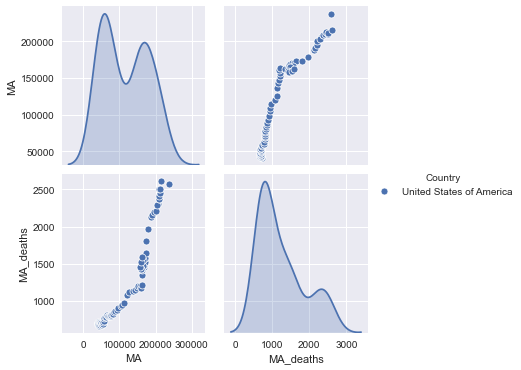

In [19]:
sns.pairplot(df1m, hue='Country')

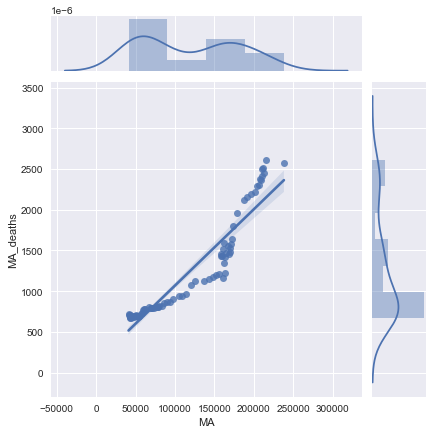

In [20]:
sns.jointplot(x='MA', y='MA_deaths', data = df1m, kind = 'reg')

## Performance messen

In [21]:
#performance
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()
print(f'performance {pc} = {now2-now} seconds')

performance DOUG = 0:00:04.652750 seconds


In [22]:
# Performance
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

x = now2 - now
x = round(x.total_seconds(),2)

print(f'performance {pc} = {x} seconds')

performance DOUG = 4.67 seconds


In [23]:
# Performance CSV einlesen
d = pd.read_csv('df_performance.csv')

In [24]:
# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x]}
#d2

In [25]:
# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

In [26]:
# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)
d.head(3)

,Date,PC,Laufzeit_in_s
0,2020-12-13 01:16:17 AM,DOUG,2.16
1,2020-12-13 01:16:41 AM,DOUG,2.02
2,2020-12-13 01:17:12 AM,DOUG,3.18


In [27]:
# Datenexport Performance
d.to_csv(r'D:\Github\Covid-19-Auswertung-WHO-DIVI\df_performance.csv', index=False)

Text(0.5, 0, 'Laufzeit [s]')

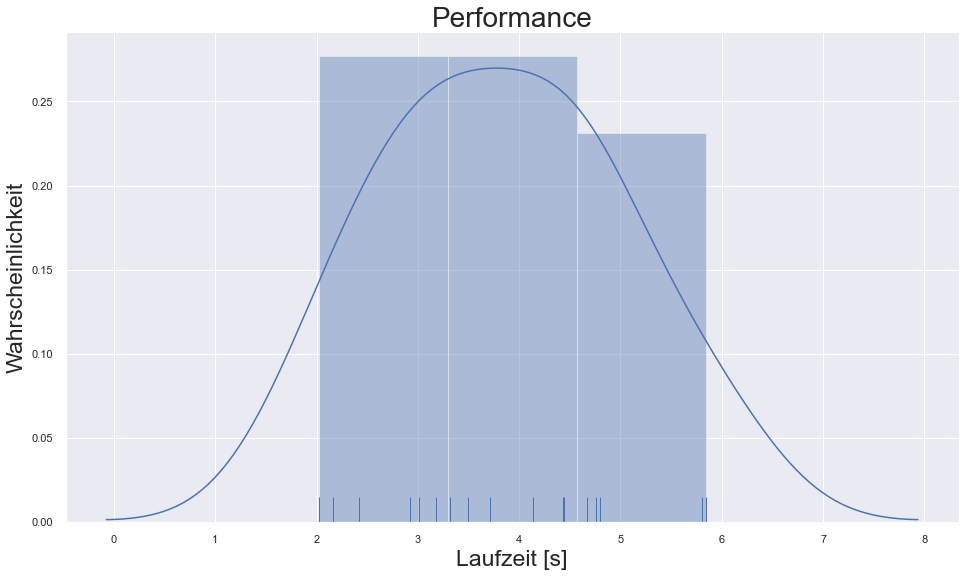

In [28]:
# Plot Performance
sns.set(rc={'figure.figsize':(16,9)})
sns_plot = sns.distplot(d['Laufzeit_in_s'],
            kde=True,
            rug=True,
            )
sns_plot.set_title('Performance',size=size)
sns_plot.set_ylabel('Wahrscheinlichkeit', size = size -5)
sns_plot.set_xlabel('Laufzeit [s]', size = size -5)

In [29]:
# Plot Performance rausschreiben
fig = sns_plot.get_figure()
fig.savefig("performance_dist.jpg") 